# The Secretary Problem

Faced with N candidates, a secretary must hire pick the best candidate. The secretary however, faces several complications:
<ol>
    <li> The candidates can only be interviewed one by one </li>
    <li> The candidates will be seen in a random order </li>
    <li> The candidate must be accepted or rejected immediately </li>
    <li> The candidates are only known by their cardinal rank, relative to all other candidates seen before them </li>
    <li> If no candidate has been selected by the end of the process, the final is selected</li>

This is quite a conundrum. 

First of all, the secretary is under a lot of pressure to pick the best candidate, anything less would constitute failure. Furthermore, there is a knowledge gap, whilst a candidate can be reviewed against all prior candidates, there's no knowing how they stand relative to the remaining candidates.

Can some maths clarify our position?

## Defining the Problem

Our secretary must work around a fundamental knowledge gap and make immediate decisions, with that in mind, is there any grounding that can be used to inform decisions?

##### Arbitrary Decisions

Consider our pool of candidates, in any given N-length list of candidates, the probability of any given candidate being the best is always P = 1/N. This does not bode well for the secretary hoping to pick a candidate at random.

In [78]:
import matplotlib.pyplot as plt
import random

In [79]:
def random_strategy(n: int, pool_len: list) -> int:
    pc = (1/pool_len)*100
    return pc

In [80]:
percentages = []
for i in range(1,101):
    result = random_strategy(1, i)
    percentages.append(result)

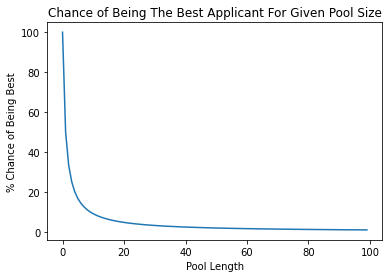

In [81]:
plt.plot(percentages)
plt.xlabel("Pool Length")
plt.ylabel("% Chance of Being Best")
plt.title("Chance of Being The Best Applicant For Given Pool Size");

Picking the Nth candidate at random is clearly not going to get the best candidate. Surely there are better strategies?

## Best of X Strategies

Assessing a candidate is hard, our secretary only knows their rank relative to previous candidates, not remaining candidates. However, with a bit of inspection we can glean more information:

Successive candidates are less and less likely to be the best seen thus far. Whilst it is not impressive for our first candidate to be the best seen so far, it is impressive for the 20th or 100th. 

The odds are $1/a_{x}$ for given candidate position, our first candidate has 1/1 odds of being the best candidate, our hundredth has 1/100 odds, much more impressive.

Armed with this knowledge we can generate a handful of strategies aimed at exploiting this.



#### Best of 2

Simply stated, we will pass over our first 'best' candidate and wait until the second time a candidate is ranked better than any previous. 

Practically speaking, this means skipping the first candidate. In a pool of 100 candidates how often do we find the winner?

In [82]:
def best_of_n(stop, pool_len):
    
    #generate a pool of candidate, number = ordinal rank, shuffle
    
    candidate_ord_pool = [i for i in range(0,pool_len)]
    random.shuffle(candidate_ord_pool)
    
    #counting number of candidates 
    
    best_candidate_counter = 0
    
    # if the candidate rank is less than the rank of any candidate prior then
    # add to a counter, 
    # if the counter is equal to the stop number (our strategy stopping point) then
    # return that candidate number, else keep going
    # if no best candidate is found by the end of the loop, return the final candidate
    
    for i in candidate_ord_pool:
        
        try:
            if i <= min(candidate_ord_pool[:candidate_ord_pool.index(i)]):
            #if i <= candidate_ord_pool[:candidate_ord_pool.index(i)]:
                best_candidate_counter += 1
                if best_candidate_counter == stop:
                    return i
                else:
                    pass
            else:
                pass
        except ValueError:
            best_candidate_counter += 1
    return candidate_ord_pool.index(pool_len -1)

    
    
    
    
    

In [83]:
def simulate_strategy(strategy, stop_nr, passes, pool_size):
    simulation_list = []
    
    for i in range(0, passes):
        x = strategy(stop = stop_nr, pool_len = pool_size)
        simulation_list.append(x)
        
    plt.hist(simulation_list)
    plt.xlabel("Candidate Rank")
    plt.ylabel("Number of times chosen")
    plt.title("Candidate Rank Chosen");
    
    success_rate = round((simulation_list.count(0)/len(simulation_list))*100, 2)    
    print(f"Best candidate selected {success_rate}% of the time")
    
    return simulation_list, success_rate    
    

Best candidate selected 5.8% of the time


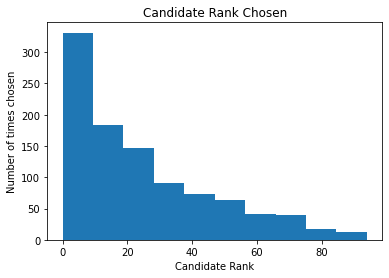

In [84]:
first = simulate_strategy(best_of_n, stop_nr = 2, passes = 1000, pool_size = 100)

At a glance, our success rate with 100 people reaches around 10%, this is much better than with random picking, but still not close to a good approach. Let us demonstrate this strategy one more time, with more granularity.

Best candidate selected 18.86% of the time


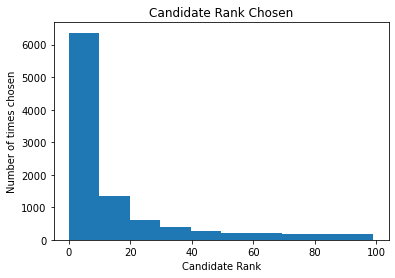

In [85]:
first = simulate_strategy(best_of_n, stop_nr = 4, passes = 10000, pool_size = 100)

Ran 10,000 times, we can see a marked improvement, with the best candidate selected nearly 20% of the time from a pool of 100, but as we are about to see, for anything larger this strategy rapidly loses accuracy.

Best candidate selected 1.6% of the time


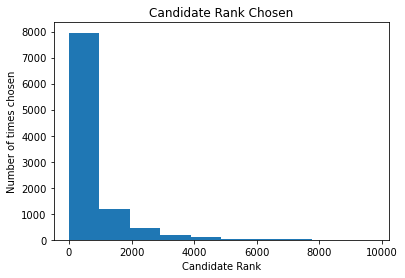

In [86]:
third = simulate_strategy(best_of_n, stop_nr = 4, passes = 10000, pool_size = 10000)

With a pool size of 10,000 ran 10,000 times, we can see the best candidate was selected only 1.48% of the time! This approach will surely cause problems for our secretary.

#### Takeaways 

It certainly is possible to tweak our 'best of x' strategy to get passable results - certainly better than randomly picking,but in fine tuning this approach we run into a major concern: <b>scaleability</b>, for candidate pools of small sizes, being too selective is detimental, meanwhile at larger candidate pool sizes we must stop at some further 'best' candidate.

Armed with this knowledge, let us look at competing variants of this strategy across scaling candidate pools.

In [87]:
def run_strategy_different_lens(stops_start: int, pool_len_start: int, passes: int, strategy_function):
    #create a range from stops
    #create a range from pool len
    results = {}
    for i in passes:
        y = simulate_strategy(strategy = best_of_n, stop_nr = stops_start, passes = passes, pool_size = pool_len_start)
        x = {'name': stops_start, 'results': y[0], 'percentage': y[1]}
        results.update(x)
        
        
        
        
        
    #
    #

IndentationError: expected an indented block (3616041218.py, line 5)

In [76]:
import matplotlib.pyplot as plt

def test_strategy1(max_pool_len, stop):
    best_candidates = []
    for pool_len in range(1, max_pool_len + 1):
        best_candidate = best_of_n(stop, pool_len)
        best_candidates.append(best_candidate)
    plt.plot(best_candidates)
    plt.xlabel('Pool Length')
    plt.ylabel('Number of Times Best Candidate Was Chosen')
    plt.title('Secretary Problem Strategy Test')
    plt.show()

In [66]:
def run_best_of_n_for_different_pool_lens(stops: int, pool_len, trials, best_of_n_func):
    # Initialize counters for the number of times the best candidate is chosen and the total number of trials
    best_candidate_count = [0] * len(stops)
    total_trials = 0
    stops = range(1,10,1)
    # Run the strategy for different stopping points
    for j in range(trials):
        for i, stop in enumerate(stops):
            candidate_ord_pool = list(range(pool_len))
            random.shuffle(candidate_ord_pool)
            if best_of_n_func(stop, candidate_ord_pool):
                best_candidate_count[i] += 1
            total_trials += 1
            
    for i in stops:
        best_of_n_func()

    # Compute the percentage of times the best candidate was chosen
    best_candidate_percentage = [100 * count / total_trials for count in best_candidate_count]

    # Create the interactive graph
    fig = make_subplots()
    fig.add_trace(go.Bar(x=stops, y=best_candidate_count, name='Count of best candidates'))
    fig.add_trace(go.Scatter(x=stops, y=best_candidate_percentage, name='Percentage of times the best candidate was chosen'))
    fig.update_layout(title='Best Candidate Count and Percentage for Different Pool Lengths and Stopping Points',
                      xaxis_title='Stopping Point',
                      yaxis_title='Best Candidate Count',
                      yaxis2=dict(title='Percentage', overlaying='y', side='right'))
    fig.show()


In [69]:
import ipywidgets as widgets
from IPython.display import display

pool_len_slider = widgets.IntSlider(value=10, min=10, max=60, step=10, description='Pool Len:')
stop_values = [2, 4, 8, 16]
trials = 100
best_of_n_func = best_of_n

def run_simulation(btn):
    run_best_of_n_for_different_pool_lens(stop_values, pool_len_slider.value, trials, best_of_n_func)

run_btn = widgets.Button(description='Run Simulation')
run_btn.on_click(run_simulation)

display(pool_len_slider)
display(run_btn)


IntSlider(value=10, description='Pool Len:', max=60, min=10, step=10)

Button(description='Run Simulation', style=ButtonStyle())

TypeError: 'list' object cannot be interpreted as an integer

TypeError: 'list' object cannot be interpreted as an integer

TypeError: 'list' object cannot be interpreted as an integer

TypeError: 'list' object cannot be interpreted as an integer

TypeError: 'list' object cannot be interpreted as an integer

TypeError: 'list' object cannot be interpreted as an integer

TypeError: 'list' object cannot be interpreted as an integer

TypeError: 'list' object cannot be interpreted as an integer

TypeError: 'list' object cannot be interpreted as an integer

TypeError: 'list' object cannot be interpreted as an integer

TypeError: 'list' object cannot be interpreted as an integer

TypeError: 'list' object cannot be interpreted as an integer

TypeError: 'list' object cannot be interpreted as an integer

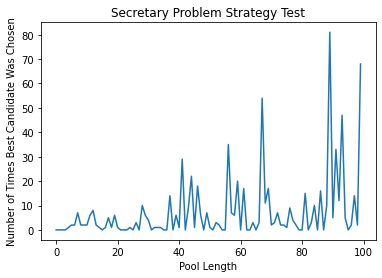

In [14]:
test_strategy(100,3)

These results are interesting, we can see that at lower candidate pools, the strategies are somewhat effective. Let us now move on to our proper solution, and the subject of this paper.

### Explore Exploit Strategy